## k nearest neighbors or kNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Really small example to illustrate idea
Xd=np.array([[1,2,0],[3,2,1],[4,5,0],[7,3,1],[5,4,1]])
#Xd=np.array([[2,3,1],[4,1,0],[5,3,0]])
# Xd=np.array([[3,2,1],[1,2,0],[4,5,0],[7,3,1],[5,4,1]])  ## order can matter for kNN
y=Xd[:,-1]
X=Xd[:,0:2]
print(y.shape)
print(X.shape)

(5,)
(5, 2)


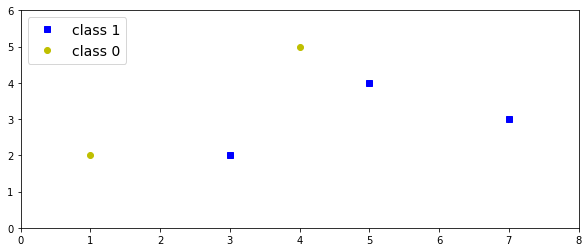

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(Xd[y==1, 0], Xd[y==1, 1], "bs", label="class 1")
plt.plot(Xd[y==0, 0], Xd[y==0, 1], "yo", label="class 0")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 8, 0, 6])
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)  ## vary n_neighbors =1,3,5 ; p=1
knn.fit(X, y)
testpoint=np.array([[2.5,2]])
knn.predict(testpoint)

array([1])

In [5]:
for i in range(11):
    xnew=1+2*i/10
    ynew=2
    testpoint=np.array([[xnew,ynew]])
    print(xnew,knn.predict(testpoint))
## Note what happens to x=2 which is exactly in the middle.

1.0 [0]
1.2 [0]
1.4 [0]
1.6 [0]
1.8 [0]
2.0 [0]
2.2 [1]
2.4 [1]
2.6 [1]
2.8 [1]
3.0 [1]


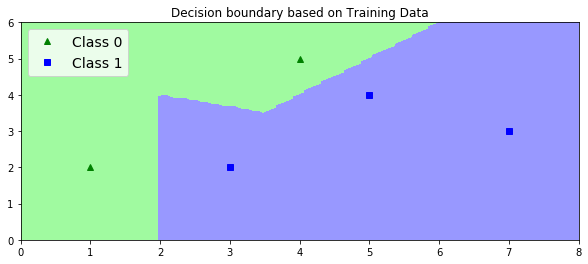

In [6]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 100).reshape(-1, 1),
        np.linspace(0, 6, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "g^", label="Class 0")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Class 1")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#a0faa0','#9898ff'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 8, 0, 6])
plt.title("Decision boundary based on Training Data")
plt.show()

In [7]:
#knn?

n_neighbors : Number of neighbors to use, default =5

weights : how to weight points (equally or by distance or custom), default = 'uniform'
    weight function used in prediction.  Possible values:

algorithm : Algorithm used to find the nearest neighbors {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'

leaf_size : Leaf size passed to BallTree or KDTree, default = 30.

metric : the distance metric to use for the tree, default 'minkowski'

$${\displaystyle D\left(X,Y\right)=\left(\sum _{i=1}^{n}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}}}$$

$p$ : Power parameter for the Minkowski metric, default = 2.  What is this for $p=1,2$?
    
metric_params : Additional keyword arguments for the metric function, default = None

n_jobs : The number of parallel jobs to run for neighbors search, default=None

In [8]:
## Return to dataset with iris petals

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
## convert class to numerical 
## using sklearn now
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
le.fit(df['class'])
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [11]:
le.transform(df['class'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['category']=le.transform(df['class'])
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [13]:
X = df[["petal_len","petal_wid"]].to_numpy()
X.shape

(150, 2)

In [14]:
y=df['category'].to_numpy()
y.shape

(150,)

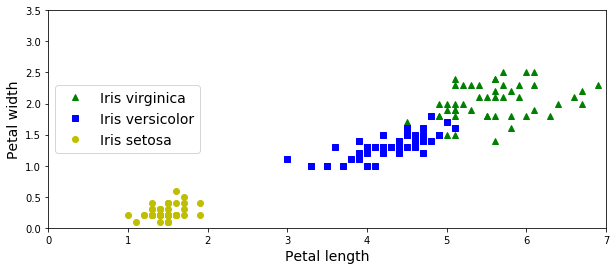

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# default is 75% / 25% train-test split
X = df[["petal_len","petal_wid"]]
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [18]:
## Note that there is a randomizer function built in to train_test_split

In [19]:
y_test.head()
## What do numbers in first column mean?

82     1
134    2
114    2
42     0
109    2
Name: category, dtype: int64

In [20]:
X_test.head()

,petal_len,petal_wid
82,3.9,1.2
134,5.6,1.4
114,5.1,2.4
42,1.3,0.2
109,6.1,2.5


In [21]:
## import knn from sklearn
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
## apply knn to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
## accuracy on training data
knn.score(X_train,y_train)

1.0

In [23]:
## check the accuracy on the testing data
knn.score(X_test, y_test)

0.9736842105263158

In [24]:
## predict on new data
knn.predict([[4,1]])

array([1])

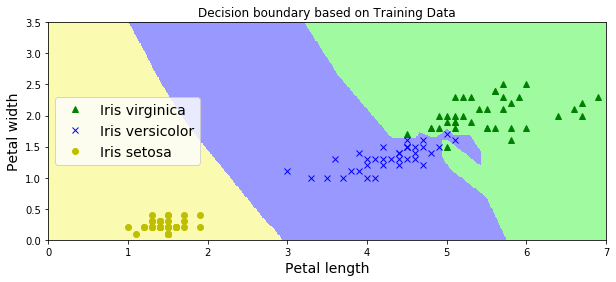

In [25]:
X1=X_train.values
y1=y_train.values
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X1[y1==2, 0], X1[y1==2, 1], "g^", label="Iris virginica")
plt.plot(X1[y1==1, 0], X1[y1==1, 1], "bx", label="Iris versicolor")
plt.plot(X1[y1==0, 0], X1[y1==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("Decision boundary based on Training Data")
plt.show()

In [26]:
##accuracy
knn.score(X_train,y_train)

1.0

In [27]:
len(X_train)

112

In [28]:
## number of correct points
len(X_train)*knn.score(X_train,y_train)

112.0

In [29]:
## It gets one point wrong. Which one? Why?

In [30]:
#knn.predict(X_test)

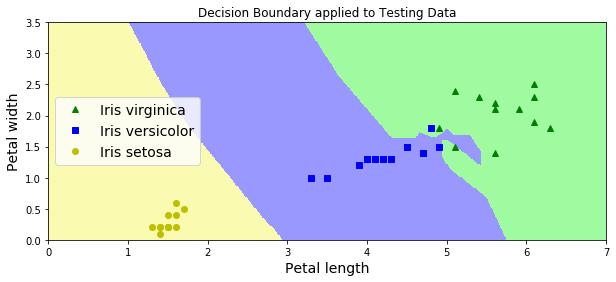

In [31]:
## What about on test data?
X1=X_test.values
y1=y_test.values
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X1[y1==2, 0], X1[y1==2, 1], "g^", label="Iris virginica")
plt.plot(X1[y1==1, 0], X1[y1==1, 1], "bs", label="Iris versicolor")
plt.plot(X1[y1==0, 0], X1[y1==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("Decision Boundary applied to Testing Data")
plt.show()

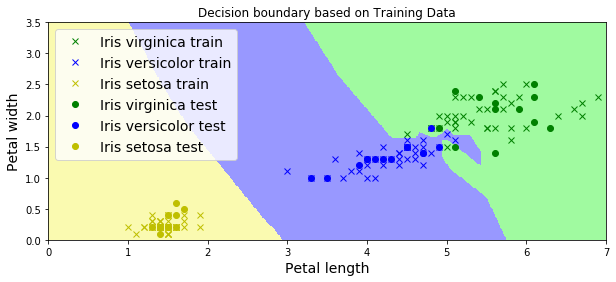

In [32]:
X1=X_train.values
y1=y_train.values
X2=X_test.values
y2=y_test.values

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X1[y1==2, 0], X1[y1==2, 1], "gx", label="Iris virginica train")
plt.plot(X1[y1==1, 0], X1[y1==1, 1], "bx", label="Iris versicolor train")
plt.plot(X1[y1==0, 0], X1[y1==0, 1], "yx", label="Iris setosa train")

plt.plot(X2[y2==2, 0], X2[y2==2, 1], "go", label="Iris virginica test")
plt.plot(X2[y2==1, 0], X2[y2==1, 1], "bo", label="Iris versicolor test")
plt.plot(X2[y2==0, 0], X2[y2==0, 1], "yo", label="Iris setosa test")

##'g^', 'bs', 'yo', 'ch' 'kp' 'mv' 'wx' 'rd' 

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("Decision boundary based on Training Data")
plt.show()

In [33]:
## Number of Incorrect
len(X_test)-knn.score(X_test,y_test)*len(X_test)

1.0

In [34]:
## Also gets one wrong.

In [35]:
df[(y!=knn.predict(X))]

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
70,5.9,3.2,4.8,1.8,Iris-versicolor,1


In [36]:
## The first one is in the training data
X_train[(X_train['petal_len']==4.8) & (X_train['petal_wid']==1.8)]
## note row 138 is from original data set, it is actually before row 70 in training set

,petal_len,petal_wid
126,4.8,1.8
138,4.8,1.8


In [37]:
## The second one is in the testing data
X_test[(X_test['petal_len']==5.1) & (X_test['petal_wid']==1.6)]

,petal_len,petal_wid


In [38]:
df[(df['petal_len']==4.8) & (df['petal_wid']==1.8)]

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
70,5.9,3.2,4.8,1.8,Iris-versicolor,1
126,6.2,2.8,4.8,1.8,Iris-virginica,2
138,6.0,3.0,4.8,1.8,Iris-virginica,2


In [39]:
df[(df['petal_len']==5.1) & (df['petal_wid']==1.6)]

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
83,6.0,2.7,5.1,1.6,Iris-versicolor,1


In [40]:
## What about different values of k?

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Train",knn.score(X_train, y_train))
print("Test",knn.score(X_test, y_test))

Train 1.0
Test 0.9736842105263158


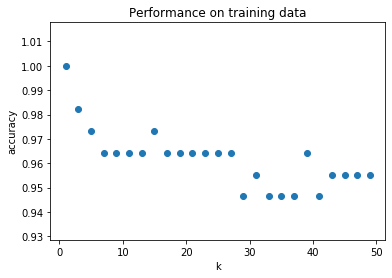

In [42]:
k_range = range(1,50,2)
scores_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title("Performance on training data")
plt.scatter(k_range, scores_train)
plt.show()

In [43]:
print(scores_train[0:10])

[1.0, 0.9821428571428571, 0.9732142857142857, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9732142857142857, 0.9642857142857143, 0.9642857142857143]


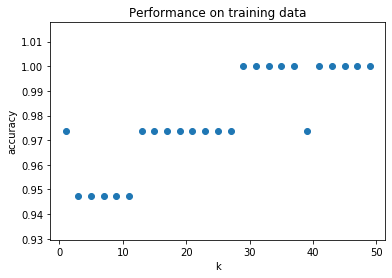

In [44]:
k_range = range(1,50,2)
scores_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_test.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores_test)
plt.title("Performance on training data")
plt.show()

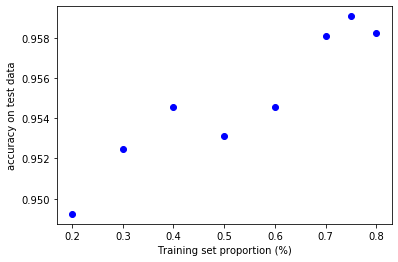

In [45]:
## What about different values for train/test split?
t=[.2,.3,.4,.5,.6,.7,.75,.8]
knn = KNeighborsClassifier(n_neighbors = 1)

plt.figure()

for s in t:

    scores = []
    for i in range(1,100):
        ## train_size = s
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-s,random_state=i)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy on test data');

In [46]:
## Note our data set is small, so there's some weird effects here. 

In [47]:
## What if we use all the features?

In [48]:
## from before
X = df[["petal_len","petal_wid"]]
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9736842105263158

In [49]:
X = df.iloc[:,0:4]
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("train",knn.score(X_train,y_train))
print("test",knn.score(X_test,y_test))

train 1.0
test 0.9736842105263158


In [50]:
## How does this model compare to logistic regression?

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
X = df[["petal_len","petal_wid"]]
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state=42, C=10^4)
## C controls regularization, large C= little regularization, small C= high regularization
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=14, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

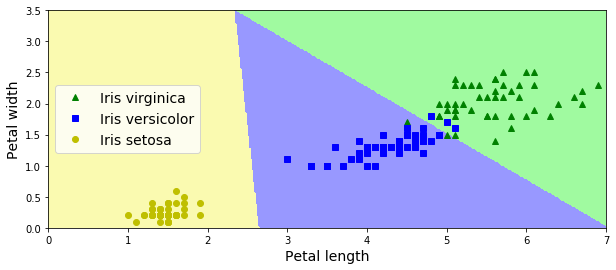

In [53]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)
X=X.values
y=y.values
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [54]:
y_predict=softmax_reg.predict(X_test)
score=y_predict==y_test
#score.value_counts()
score.sum()/len(score)

0.9736842105263158

In [55]:
y_predict=softmax_reg.predict(X_train)
score=y_predict==y_train
#score.value_counts()
score.sum()/len(score)

0.9642857142857143

In [56]:
## Roughly equivalent